In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:
 # reading csv file
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
#  checking for null value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
#  getiing curent year
now =datetime.datetime.now()
#  subtracting year from current year 
df['No_of_year'] = [(now.year -yr ) for yr in df['Year']]
#  droping Year columns
df.drop('Year', 1, inplace=True)  

In [7]:
df.Seller_Type.unique()
df.groupby(['Seller_Type']).count()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,No_of_year
Seller_Type,,,,,,,,
Dealer,195,195,195,195,195,195,195,195
Individual,106,106,106,106,106,106,106,106


In [8]:
#  change Seller_Type (string to int)
sel_type = {'Dealer': 0,'Individual': 1}
df['Seller_Type'] = [sel_type.get(i) for i in df['Seller_Type']]  
  
#  change Transmission (string to int)  
trans = {'Manual':0, 'Automatic':1 }
df['Transmission'] = [trans.get(i) for i in df['Transmission']]

#  change Fuel_Type (string to int) 
fuel = {'Petrol':0, 'Diesel':1, 'CNG':2}
df['Fuel_Type'] = [fuel.get(i) for i in df['Fuel_Type']]


In [9]:
df.drop('Car_Name', axis = 1, inplace=True)

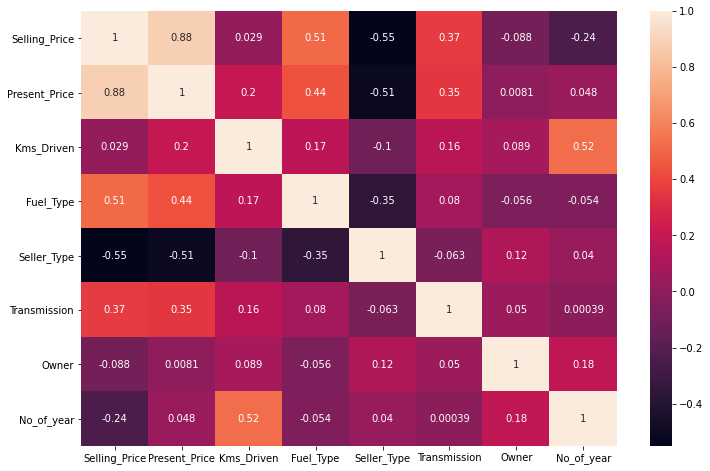

In [10]:
# creating correlation matrix for feature selection
corrmat = df.corr()
index = corrmat.index
plt.figure(figsize = (12, 8))
sns.heatmap(df[index].corr(), annot=True)

In [11]:
# 2 to last columns
X = df.iloc[:, 1:]
#  1 columns
y = df.iloc[:, 0]

In [12]:
# getting the important feature
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

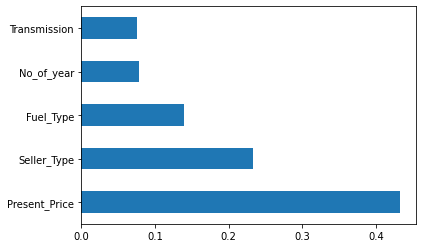

In [13]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
# top 5 feature
imp_feature.nlargest(5).plot(kind='barh')
plt.show()


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [15]:
model = RandomForestRegressor()

In [16]:
n_estimators = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto', 'sqrt']

max_depth = [ int(x) for x in np.linspace(5, 30 , 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]


In [17]:
random_grid = {'n_estimators': n_estimators, 
               'max_features':max_features, 
               'max_depth': max_depth,
               'min_samples_split':min_samples_split, 
               'min_samples_leaf': min_samples_leaf }


In [18]:
r_model = RandomizedSearchCV(estimator=model,
                             param_distributions = random_grid, 
                             scoring='neg_mean_squared_error',
                             n_iter=1, cv=5, verbose=2, 
                             random_state=42, n_jobs=1
                            )


In [19]:
r_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [20]:
r_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [21]:
r_model.best_score_

-6.635076990445708

In [22]:
predict = r_model.predict(X_test)

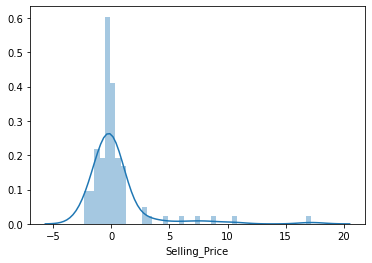

In [23]:
sns.distplot(y_test-predict)

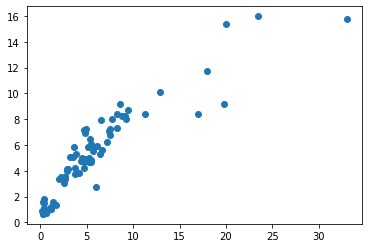

In [24]:
plt.scatter(y_test, predict)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))


MAE: 1.2965519176876978
MSE: 7.535220372418161
RMSE: 2.745035586730737


In [26]:
# creating model 
import pickle

file = open('car_price_predict', 'wb')

pickle.dump(r_model, file)

In [28]:
pip freeze > requirement.txt

Note: you may need to restart the kernel to use updated packages.
